# Análisis de mercado de taxis en Chicago: Patrones de viaje y factores climáticos para Zuber

Este análisis se realiza para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. El objetivo es encontrar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

El proyecto se divide en dos fases principales: primero, se trabajará con una base de datos para analizar los datos de los competidores del mercado de taxis en Chicago, identificando patrones en el comportamiento de viajes y preferencias de destinos. Posteriormente, se probará una hipótesis específica sobre el impacto del clima en la duración de los viajes.

El análisis proporcionará insights sobre:
- Patrones en los datos de empresas competidoras de taxis
- Preferencias de los pasajeros en cuanto a destinos (barrios)
- Impacto de las condiciones climáticas en el comportamiento de viajes

Los resultados obtenidos servirán como base informativa para el lanzamiento de Zuber en el mercado de Chicago.

## Inicialización

In [38]:
# CARGA DE LIBRERÍAS PARA EL ANÁLISIS DEL PROYECTO ZUBER

# Manipulación y análisis de datos

import pandas as pd   # Biblioteca principal para manipular tablas
import numpy as np    # Operaciones numéricas y matemáticas

# Visualización de datos

import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns            # Gráficos estadísticos más avanzados

# Análisis estadístico

from scipy import stats          # Pruebas estadísticas 

# Paso 4. Análisis exploratorio de datos 

En esta etapa del proyecto, realizaremos un análisis exploratorio de los datos obtenidos en las consultas SQL anteriores. Trabajaremos con dos datasets clave que nos permitirán entender el comportamiento del mercado de taxis en Chicago:

### Datasets a analizar:
- project_sql_result_01.csv: Información sobre las compañías de taxis y su volumen de viajes durante el 15 y 16 de noviembre de 2017
- project_sql_result_04.csv: Datos sobre los barrios de Chicago donde finalizaron los viajes y el promedio mensual de noviembre 2017

### Objetivos del análisis:
- Validar la calidad y estructura de los datos importados
- Identificar las compañías de taxis más activas y los 10 barrios con mayor demanda
- Crear visualizaciones que revelen patrones en el comportamiento de los usuarios
- Extraer conclusiones basadas en evidencia para apoyar las decisiones de negocio de Zuber

Este análisis nos proporcionará insights valiosos sobre el mercado de taxis en Chicago, identificando oportunidades estratégicas para el lanzamiento de la nueva aplicación.

## 4.1. Carga y limpieza de datos

In [39]:
# Cargar el archivo con información sobre las compañías de taxis y el número de viajes
# Este DataFrame contiene el nombre de la empresa de taxis y la cantidad de viajes realizados
taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')

# Cargar el archivo con información sobre los barrios donde finalizaron los viajes
# Este DataFrame contiene el nombre del barrio y el promedio de viajes que terminaron allí
dropoff_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [40]:
# Explorar información básica del dataset de compañías de taxi
taxi_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [41]:
# Ver muestra de los datos de compañías y cantidad de viajes
taxi_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [42]:
# Explorar información básica del dataset de ubicaciones de destino
dropoff_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [43]:
# Ver muestra de los datos de barrios y promedio de viajes
dropoff_locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [44]:
# Contar duplicados en cada dataset
print("Número de duplicados en taxi_companies:", taxi_companies.duplicated().sum())
print("Número de duplicados en dropoff_locations:", dropoff_locations.duplicated().sum())

Número de duplicados en taxi_companies: 0
Número de duplicados en dropoff_locations: 0


### Conclusión del proceso de limpieza de datos

Tras realizar un análisis preliminar de ambos datasets, se puede confirmar que los datos se encuentran en excelente estado y no requieren procesos de limpieza adicionales.

1. Para el dataset taxi_companies:

- La columna company_name (tipo object) presenta un formato consistente sin irregularidades en mayúsculas, minúsculas o espacios adicionales
- La columna trips_amount (tipo int64) contiene valores numéricos enteros apropiados para representar cantidades de viajes
- Se verificó la ausencia total de valores nulos en ambas columnas
- No se identificaron registros duplicados en el dataset

2. Para el dataset dropoff_locations:

- La columna dropoff_location_name (tipo object) mantiene una nomenclatura uniforme de los barrios de Chicago sin inconsistencias de formato
- La columna average_trips (tipo float64) presenta valores decimales correctos para representar promedios de viajes
- Se confirmó la integridad completa de los datos sin valores nulos
- No se detectaron registros duplicados

### Validación de tipos de datos:

Los tipos de datos asignados automáticamente por pandas son completamente apropiados para el análisis posterior: object para variables categóricas de texto, int64 para conteos enteros de viajes, y float64 para valores promedio con decimales.

## 4.2 Los 10 principales barrios en términos de finalización del recorrido

In [45]:
# Ordenar los barrios por el promedio de viajes en orden descendente
top_10_dropoff_locations = (
    dropoff_locations
    .sort_values(by='average_trips', ascending=False)
    .head(10)
)

# Mostrar los 10 barrios con mayor promedio de viajes finalizados
print('Top 10 barrios con mayor promedio de viajes finalizados:\n')
top_10_dropoff_locations

Top 10 barrios con mayor promedio de viajes finalizados:



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## 4.3 Visualización de datos: empresas de taxis y barrios principales por finalizaciones

### Gráfico 1: Empresas de taxis y número de viajes

Objetivo: identificar qué compañías dominan el número de viajes

In [46]:
# Calcular el total de viajes
total_trips = taxi_companies['trips_amount'].sum()

# Crear una nueva columna con el porcentaje de viajes sobre el total
taxi_companies['percentage'] = (taxi_companies['trips_amount'] / total_trips) * 100

# Ordenar las empresas por número de viajes en orden descendente
taxi_companies_sorted = taxi_companies.sort_values(by='trips_amount', ascending=False)

# Redondear el porcentaje a 2 decimales para mejor lectura
taxi_companies_sorted['percentage'] = taxi_companies_sorted['percentage'].round(2)

# Mostrar la tabla final (top 10 empresas)
taxi_companies_sorted.head(10)

,company_name,trips_amount,percentage
0,Flash Cab,19558,14.24
1,Taxi Affiliation Services,11422,8.32
2,Medallion Leasing,10367,7.55
3,Yellow Cab,9888,7.20
4,Taxi Affiliation Service Yellow,9299,6.77
5,Chicago Carriage Cab Corp,9181,6.69
6,City Service,8448,6.15
7,Sun Taxi,7701,5.61
8,Star North Management LLC,7455,5.43
9,Blue Ribbon Taxi Association Inc.,5953,4.34


In [47]:
# Análisis de concentración del mercado - Top 10 empresas
print("    ANÁLISIS DE CONCENTRACIÓN DEL MERCADO    \n")

# 1. Datos del Top 10
top_10_trips = taxi_companies_sorted.head(10)['trips_amount'].sum()
top_10_percentage = taxi_companies_sorted.head(10)['percentage'].sum()

print("TOP 10 EMPRESAS:")
print(f"   • Viajes totales: {top_10_trips:,.2f}")
print(f"   • Porcentaje del mercado: {top_10_percentage:.2f}%")

# 2. Datos del total del mercado
total_companies = len(taxi_companies_sorted)
total_market_trips = taxi_companies_sorted['trips_amount'].sum()

print(f"\nMERCADO TOTAL:")
print(f"   • Total de empresas: {total_companies}")
print(f"   • Viajes totales: {total_market_trips:,.2f}")
print(f"   • Porcentaje total: 100.00%")

# 3. Análisis de concentración
remaining_companies = total_companies - 10
remaining_trips = total_market_trips - top_10_trips
remaining_percentage = 100 - top_10_percentage

print(f"\nCONCENTRACIÓN DEL MERCADO:")
print(f"   • Las {10} principales empresas ({10/total_companies*100:.2f}% del total)")
print(f"     controlan {top_10_percentage:.2f}% del mercado")
print(f"   • Las {remaining_companies} empresas restantes ({remaining_companies/total_companies*100:.2f}% del total)")
print(f"     controlan {remaining_percentage:.2f}% del mercado")

    ANÁLISIS DE CONCENTRACIÓN DEL MERCADO    

TOP 10 EMPRESAS:
   • Viajes totales: 99,272.00
   • Porcentaje del mercado: 72.30%

MERCADO TOTAL:
   • Total de empresas: 64
   • Viajes totales: 137,311.00
   • Porcentaje total: 100.00%

CONCENTRACIÓN DEL MERCADO:
   • Las 10 principales empresas (15.62% del total)
     controlan 72.30% del mercado
   • Las 54 empresas restantes (84.38% del total)
     controlan 27.70% del mercado


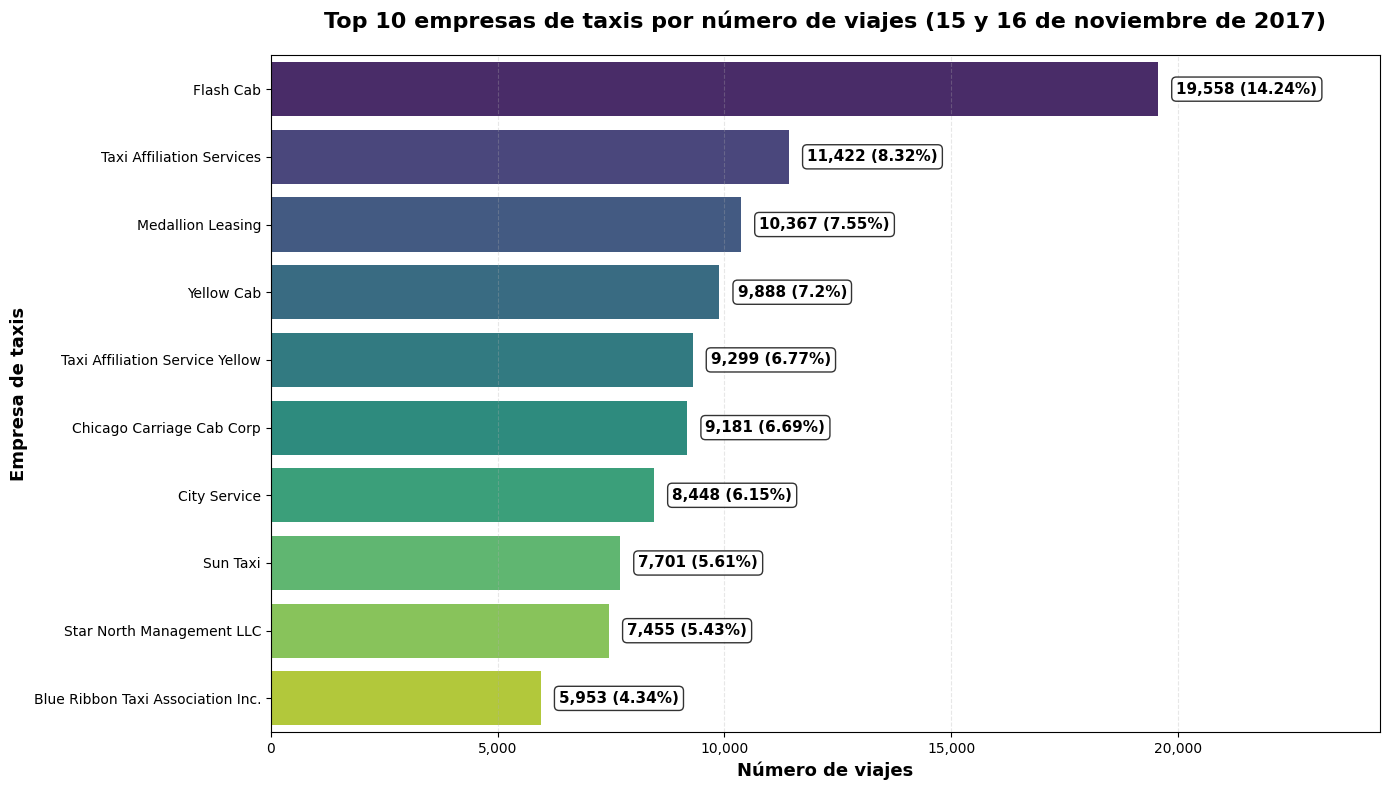

In [48]:
# Seleccionar las 10 empresas con mayor número de viajes
top_10_companies = (
    taxi_companies_sorted
    .head(10)
)

# Crear gráfico de barras con mejoras visuales
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_companies, x='trips_amount', y='company_name', 
                 palette='viridis')

# Agregar etiquetas con formato (separador de miles)
for i, (trips, percentage) in enumerate(zip(top_10_companies['trips_amount'], 
                                          top_10_companies['percentage'])):
    ax.text(trips + 400, i, f'{trips:,.0f} ({percentage}%)', 
            va='center', ha='left', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Configuración del gráfico
plt.title('Top 10 empresas de taxis por número de viajes (15 y 16 de noviembre de 2017)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de viajes', fontsize=13, fontweight='bold')
plt.ylabel('Empresa de taxis', fontsize=13, fontweight='bold')

# Formato del eje x con separador de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Agregar líneas de cuadrícula para mejor lectura
ax.grid(True, axis='x', alpha=0.3, linestyle='--')

# Ajustar límites y espaciado
plt.xlim(0, max(top_10_companies['trips_amount']) * 1.25)
plt.tight_layout()

# Mostrar gráfico
plt.show()

### Gráfico 2: Top 10 barrios por número promedio de finalizaciones

Objetivo: identificar los barrios con mayor concentración de destinos

In [49]:
# Calcular el total de viajes promedio en los barrios
total_average_trips = dropoff_locations['average_trips'].sum()

# Crear una nueva columna con el porcentaje de viajes sobre el total
dropoff_locations['percentage'] = (dropoff_locations['average_trips'] / total_average_trips) * 100

# Ordenar los barrios por número promedio de viajes en orden descendente
dropoff_locations_sorted = dropoff_locations.sort_values(by='average_trips', ascending=False)

# Redondear el porcentaje a 2 decimales para mejor lectura
dropoff_locations_sorted['percentage'] = dropoff_locations_sorted['percentage'].round(2)

# Mostrar la tabla final (top 10 barrios)
dropoff_locations_sorted.head(10)

,dropoff_location_name,average_trips,percentage
0,Loop,10727.466667,19.02
1,River North,9523.666667,16.89
2,Streeterville,6664.666667,11.82
3,West Loop,5163.666667,9.16
4,O'Hare,2546.900000,4.52
5,Lake View,2420.966667,4.29
6,Grant Park,2068.533333,3.67
7,Museum Campus,1510.000000,2.68
8,Gold Coast,1364.233333,2.42
9,Sheffield & DePaul,1259.766667,2.23


In [50]:
# Análisis de concentración del mercado - Top 10 barrios
print("    ANÁLISIS DE CONCENTRACIÓN DE DESTINOS   \n")

# 1. Datos del Top 10 - USAR dropoff_locations_sorted en lugar de top_10_dropoff_locations
top_10_trips = dropoff_locations_sorted.head(10)['average_trips'].sum()
top_10_percentage = dropoff_locations_sorted.head(10)['percentage'].sum()

print("TOP 10 BARRIOS:")
print(f"   • Viajes totales: {top_10_trips:,.2f}")
print(f"   • Porcentaje del mercado: {top_10_percentage:.2f}%")

# 2. Datos del total del mercado
total_neighborhoods = len(dropoff_locations_sorted)
total_market_trips = dropoff_locations_sorted['average_trips'].sum()

print(f"\nTOTAL DE DESTINOS:")
print(f"   • Total de barrios: {total_neighborhoods}")
print(f"   • Viajes totales: {total_market_trips:,.2f}")
print(f"   • Porcentaje total: 100.00%")

# 3. Análisis de concentración
remaining_neighborhoods = total_neighborhoods - 10
remaining_trips = total_market_trips - top_10_trips
remaining_percentage = 100 - top_10_percentage

print(f"\nCONCENTRACIÓN DE DESTINOS:")
print(f"   • Los {10} principales barrios ({10/total_neighborhoods*100:.2f}% del total)")
print(f"     concentran {top_10_percentage:.2f}% de los destinos")
print(f"   • Los {remaining_neighborhoods} barrios restantes ({remaining_neighborhoods/total_neighborhoods*100:.2f}% del total)")
print(f"     concentran {remaining_percentage:.2f}% de los destinos")

    ANÁLISIS DE CONCENTRACIÓN DE DESTINOS   

TOP 10 BARRIOS:
   • Viajes totales: 43,249.87
   • Porcentaje del mercado: 76.70%

TOTAL DE DESTINOS:
   • Total de barrios: 94
   • Viajes totales: 56,395.65
   • Porcentaje total: 100.00%

CONCENTRACIÓN DE DESTINOS:
   • Los 10 principales barrios (10.64% del total)
     concentran 76.70% de los destinos
   • Los 84 barrios restantes (89.36% del total)
     concentran 23.30% de los destinos


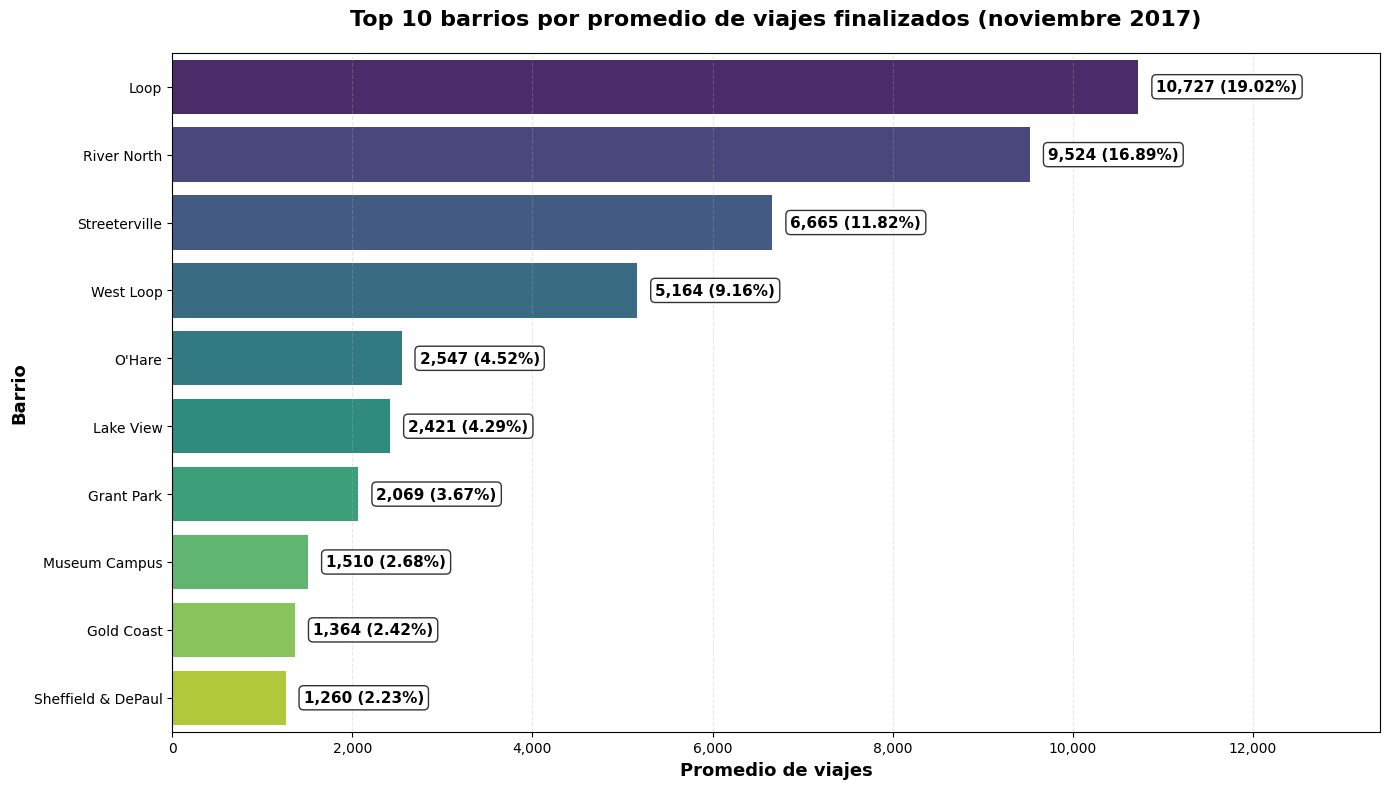

In [51]:
# Seleccionar los 10 barrios con mayor promedio de viajes finalizados
top_10_dropoff_locations = (
    dropoff_locations_sorted
    .head(10)
)

# Crear gráfico de barras con mejoras visuales
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_dropoff_locations, x='average_trips', y='dropoff_location_name', 
                 palette='viridis')

# Agregar etiquetas con formato (separador de miles)
for i, (trips, percentage) in enumerate(zip(top_10_dropoff_locations['average_trips'], 
                                          top_10_dropoff_locations['percentage'])):
    ax.text(trips + 200, i, f'{trips:,.0f} ({percentage}%)', 
            va='center', ha='left', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Configuración del gráfico
plt.title('Top 10 barrios por promedio de viajes finalizados (noviembre 2017)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Promedio de viajes', fontsize=13, fontweight='bold')
plt.ylabel('Barrio', fontsize=13, fontweight='bold')

# Formato del eje x con separador de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Agregar líneas de cuadrícula para mejor lectura
ax.grid(True, axis='x', alpha=0.3, linestyle='--')

# Ajustar límites y espaciado
plt.xlim(0, max(top_10_dropoff_locations['average_trips']) * 1.25)
plt.tight_layout()

# Mostrar gráfico
plt.show()

## 4.4 CONCLUSIONES

### 1. Empresas de taxis y número de viajes

1) Alta concentración del mercado en pocas empresas

- Las 10 principales empresas concentran el 72.30% del total de viajes.
- Esto significa que solo el 15.6% de las empresas (10 de 64) controlan casi tres cuartas partes del mercado.
- En contraste, las 54 empresas restantes (84.4%) solo representan el 27.70% de los viajes.

##### Conclusión: el mercado de taxis en Chicago presenta una estructura altamente concentrada, donde pocas empresas dominan la operación.

2) Liderazgo de Flash Cab

- Flash Cab ocupa el primer lugar con 19,558 viajes, equivalente al 14.24% del total.
- Su participación es la más alta del ranking, lo que la posiciona como líder del mercado.
- Sin embargo, la diferencia frente a otras empresas del top 10 no es extrema.

##### Conclusión: Flash Cab lidera el mercado, pero enfrenta competencia relevante por parte de otras grandes empresas.

3) Competencia entre las principales empresas

- Empresas como Taxi Affiliation Services, Medallion Leasing y Yellow Cab presentan volúmenes de viajes relativamente similares.
- Sus participaciones individuales oscilan entre aproximadamente 6% y 8% del total.

 ##### Conclusión: existe un grupo de empresas líderes con participación comparable, lo que sugiere un entorno competitivo entre los principales operadores.

4) Brecha entre grandes y pequeñas empresas

- La diferencia entre el top 10 y el resto de las empresas es significativa.
- La mayoría de las compañías fuera del top 10 tienen una participación marginal en el mercado.

##### Conclusión: el mercado no está distribuido de forma equitativa; las empresas pequeñas tienen un impacto limitado en el volumen total de viajes.

5) Implicaciones del patrón observado

- Las empresas líderes probablemente cuentan con:

  - mayor flota de vehículos
  - mayor cobertura operativa
  - mayor reconocimiento de marca
  - mejor capacidad para captar demanda

- Este patrón es típico de mercados con economías de escala, donde las empresas grandes concentran la actividad.

##### Conclusión: la concentración del mercado sugiere ventajas competitivas estructurales para las empresas líderes.

6) Interpretación global del mercado

- A pesar de existir 64 empresas de taxis, el mercado real está dominado por un grupo reducido de operadores.
- La suma del porcentaje del top 10 evidencia que la demanda se canaliza principalmente hacia las empresas más grandes.


#### Conclusión final: el mercado de taxis en Chicago presenta una fuerte concentración empresarial, lo que indica que la competencia efectiva se da principalmente entre las empresas del top 10, mientras que el resto participa de manera marginal.

### 2. Top 10 barrios por número promedio de finalizaciones

1) Alta concentración geográfica de los viajes

- Los 10 principales barrios concentran el 76.70% del total de destinos.
- Esto significa que solo el 10.64% de los barrios (10 de 94) reciben más de tres cuartas partes de los viajes finalizados.
- En contraste, los 84 barrios restantes (89.36%) concentran apenas el 23.30% de los viajes.

##### Conclusión: la demanda de viajes en Chicago está fuertemente concentrada en un número reducido de zonas.

2) Liderazgo del barrio Loop

- Loop ocupa el primer lugar con un promedio de 10,727 viajes, equivalente al 19.02% del total.
- Su participación es la más alta entre todos los barrios del ranking.
- La diferencia frente a otros barrios es significativa, especialmente frente a los que ocupan posiciones inferiores del top 10.

##### Conclusión: Loop es el principal punto de destino de los viajes de taxi, reflejando su rol como centro financiero, comercial y turístico de la ciudad.

3) Importancia de River North y Streeterville

- River North ocupa el segundo lugar con el 16.89% del total.
- Streeterville se ubica en tercer lugar con el 11.82%.
- Junto con Loop, estos tres barrios concentran una proporción muy elevada de los viajes finalizados.

##### Conclusión: los viajes de taxi se concentran principalmente en zonas céntricas y de alta actividad económica.

4) Brecha entre los principales barrios y el resto

- Existe una diferencia clara entre los primeros tres barrios y los demás del top 10.
- A partir del cuarto lugar (West Loop), el promedio de viajes disminuye progresivamente.
- Los barrios fuera del top 10 presentan una participación marginal en el total de destinos.

##### Conclusión: la distribución de los viajes entre barrios es desigual, con una fuerte concentración en zonas estratégicas.

5) Presencia de zonas estratégicas en el top 10

- El ranking incluye barrios asociados a diferentes tipos de actividad urbana:

  - O'Hare: nodo de transporte (aeropuerto)
  - River North, Streeterville, Gold Coast: zonas comerciales y turísticas
  - Grant Park y Museum Campus: áreas culturales y recreativas
  - Lake View: zona residencial con alta actividad

##### Conclusión: los viajes de taxi están estrechamente vinculados a centros de actividad económica, turística y de transporte.

6) Interpretación global del patrón de movilidad

- A pesar de existir 94 barrios, la mayor parte de los viajes se concentra en un grupo muy reducido de zonas.
- Este patrón es consistente con el análisis de las empresas de taxis, donde también se observa una alta concentración de la actividad.

#### Conclusión final: el comportamiento de los viajes de taxi en Chicago muestra una doble concentración: empresarial (pocas compañías dominan el mercado) y geográfica (pocos barrios concentran la mayoría de los destinos).

### Esto sugiere que la demanda de taxis está impulsada principalmente por zonas estratégicas de la ciudad y atendida por un grupo limitado de empresas líderes.

# Paso 5. Prueba de hipótesis 

En esta etapa final del proyecto, aplicaremos métodos de estadística inferencial para validar una hipótesis específica sobre el comportamiento de los viajes en taxi. Utilizaremos técnicas de prueba de hipótesis para determinar si existe una diferencia estadísticamente significativa en la duración de los viajes bajo condiciones específicas.

### Datasets a analizar:
- project_sql_result_07.csv: Datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, que incluye información temporal, condiciones climáticas y duración de los trayectos

### Objetivos del análisis:
- Establecer un nivel de significación (α) apropiado para la prueba estadística
- Formular correctamente las hipótesis nula y alternativa para evaluar el impacto de los sábados lluviosos en la duración de viajes
- Seleccionar y justificar el criterio estadístico más adecuado para probar la hipótesis
- Analizar los datos para comparar duraciones promedio entre sábados lluviosos y otras condiciones
- Interpretar los resultados de la prueba estadística y extraer conclusiones sobre la hipótesis planteada: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

## 5.1. Carga y limpieza de datos

In [52]:
# Cargar los datos del archivo CSV
trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

# Explorar información básica del dataset de viajes con condiciones climáticas
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [53]:
# Ver muestra de los datos de viajes con información climática
trips_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [54]:
# Contar duplicados en el dataset
print("Número de duplicados en trips_weather:", trips_weather.duplicated().sum())

Número de duplicados en trips_weather: 197


### Conclusión del proceso de limpieza de datos para trips_weather

Tras realizar un análisis preliminar del dataset trips_weather, se identificaron las siguientes características y consideraciones para el análisis:

#### Estructura del dataset:
- Contiene 1,068 registros con 3 columnas de información
- La columna start_ts (tipo object) presenta fechas y horas en formato string que requerirán conversión a datetime para facilitar el análisis temporal
- La columna weather_conditions (tipo object) contiene categorías climáticas consistentes
- La columna duration_seconds (tipo float64) presenta valores decimales apropiados para representar la duración de viajes en segundos

#### Integridad de los datos:
- Se verificó la ausencia total de valores nulos en las tres columnas (1,068 non-null en cada una)
- Se identificaron 197 registros duplicados que deberán ser evaluados y tratados según corresponda antes de proceder con el análisis de hipótesis sobre el impacto del clima

#### Recomendaciones para el procesamiento:
- Convertir la columna start_ts a formato datetime
- Evaluar y decidir el tratamiento de los 197 duplicados identificados

El dataset se encuentra en condiciones adecuadas para el análisis una vez aplicadas las correcciones mencionadas.

In [55]:
# Convertir la columna start_ts a formato datetime
trips_weather['start_ts'] = pd.to_datetime(trips_weather['start_ts'])

trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [56]:
# Tratamiento de los 197 duplicados identificados

# Examinar algunos duplicados para entender el patrón
duplicados = trips_weather[trips_weather.duplicated(keep=False)]
print("Primeros duplicados encontrados:")
duplicados.head()

Primeros duplicados encontrados:


,start_ts,weather_conditions,duration_seconds
4,2017-11-11 07:00:00,Good,1440.0
8,2017-11-11 14:00:00,Good,2460.0
10,2017-11-18 06:00:00,Good,1500.0
16,2017-11-04 12:00:00,Good,2640.0
23,2017-11-04 14:00:00,Good,3360.0


#### Análisis de registros duplicados en el Dataset
Durante la exploración del dataset trips_weather, se identificaron 197 registros duplicados de un total de 1,068 registros (18.5%). Estos duplicados presentan valores idénticos en start_ts, weather_conditions y duration_seconds.

#### Posibles causas de los duplicados
El alto porcentaje sugiere errores sistemáticos en la obtención de datos:
- Error en la extracción: Problemas en las operaciones JOIN de la consulta SQL
- Duplicados en la base original: Fallas técnicas o errores de sincronización en el sistema de Zuber
- Múltiples fuentes: El mismo viaje registrado por diferentes sistemas (app móvil, GPS, facturación)

#### Justificación para la eliminación
El 18.5% de duplicados representa una proporción significativa que podría sesgar el análisis estadístico y comprometer las conclusiones sobre el impacto climático en la duración de viajes. Los duplicados inflarían artificialmente ciertos patrones, llevando a conclusiones erróneas en la prueba de hipótesis.

Por tanto, se eliminarán los registros duplicados para garantizar la integridad del análisis y obtener resultados confiables del comportamiento real de los viajes Loop-O'Hare.

In [57]:
# Eliminar duplicados del dataset
trips_weather_clean = trips_weather.drop_duplicates()
print(f"Registros antes de eliminar duplicados: {len(trips_weather)}")
print(f"Registros después de eliminar duplicados: {len(trips_weather_clean)}")
print(f"Duplicados eliminados: {len(trips_weather) - len(trips_weather_clean)}")

Registros antes de eliminar duplicados: 1068
Registros después de eliminar duplicados: 871
Duplicados eliminados: 197


In [58]:
print(trips_weather_clean['weather_conditions'].unique())

['Good' 'Bad']


## 5.2 Análisis de prueba de hipótesis: Duración de viajes en sábados lluviosos

#### Establecimiento del nivel de significación (α = 0.05)

Para este análisis estadístico, estableceremos un nivel de significación de α = 0.05 (5%) como criterio estándar. Este valor representa la probabilidad máxima que estamos dispuestos a aceptar de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera). Un α = 0.05 es ampliamente aceptado en la investigación porque proporciona un equilibrio razonable entre ser demasiado estricto (lo que podría llevar a no detectar diferencias reales) y ser demasiado permisivo (lo que podría llevar a conclusiones erróneas).

#### Planteamiento de las hipótesis

- Hipótesis Nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos. Es decir, no existe diferencia significativa entre la duración promedio de los viajes en sábados con mal clima versus sábados con buen clima.

- Hipótesis Alternativa (H₁): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados lluviosos. Existe una diferencia significativa entre las duraciones promedio según las condiciones climáticas.

#### Metodología y criterio de prueba

Para evaluar esta hipótesis, aplicaremos la prueba t de Student para muestras independientes (stats.ttest_ind) por las siguientes razones metodológicas:

- Naturaleza de los datos: Compararemos dos grupos independientes (viajes en sábados lluviosos vs. sábados con buen clima)
- Variable de interés: La duración de los viajes es una variable continua medida en segundos
- Supuestos de la prueba: Asumiremos que las duraciones siguen una distribución aproximadamente normal y utilizaremos equal_var=False para no asumir varianzas iguales entre grupos

#### Proceso de análisis
El análisis seguirá estos pasos:

1. Filtrar los datos para incluir únicamente viajes realizados los sábados
2. Separar los viajes según las condiciones climáticas (Bad vs. Good)
3. Calcular las duraciones promedio para cada grupo
4. Aplicar la prueba t de Student para muestras independientes
5. Comparar el valor p obtenido con el nivel de significación establecido
6. Tomar una decisión estadística sobre la hipótesis planteada

Este enfoque metodológico nos permitirá determinar si existe evidencia estadística suficiente para concluir que las condiciones climáticas adversas impactan significativamente la duración de los viajes los sábados.

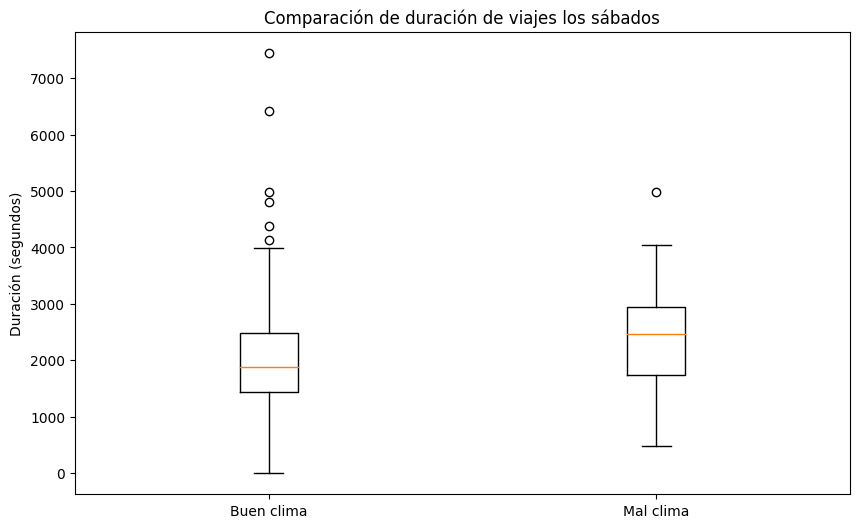

In [59]:
# Gráfico de comparación de duraciones
plt.figure(figsize=(10, 6))
plt.boxplot([good_weather, bad_weather], labels=['Buen clima', 'Mal clima'])
plt.title('Comparación de duración de viajes los sábados')
plt.ylabel('Duración (segundos)')
plt.show()

In [60]:
# Filtrar solo los viajes realizados los sábados
saturday_trips = trips_weather_clean[trips_weather_clean['start_ts'].dt.dayofweek == 5]

# Separar los viajes según las condiciones climáticas
bad_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Good']['duration_seconds']

# Calcular las medias de duración de los viajes
mean_bad_weather = bad_weather.mean()
mean_good_weather = good_weather.mean()

print("Duración promedio con mal clima (segundos):", mean_bad_weather)
print("Duración promedio con buen clima (segundos):", mean_good_weather)

Duración promedio con mal clima (segundos): 2409.2297297297296
Duración promedio con buen clima (segundos): 2032.253112033195


In [61]:
# Definir el nivel de significación
alpha = 0.05

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=False)

print("Valor p:", p_value)

Valor p: 9.126383933880083e-08


In [62]:
# Evaluar la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia en sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que la duración promedio cambie en sábados lluviosos.")

Rechazamos la hipótesis nula: la duración promedio de los viajes cambia en sábados lluviosos.


## 5.3 Conclusión del análisis estadístico

Basado en el análisis de la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados, se obtuvieron los siguientes resultados:

#### Análisis descriptivo:
Los datos muestran una diferencia notable en la duración promedio de los viajes:
- Sábados con mal clima (lluviosos): 2,409.23 segundos (aproximadamente 40.15 minutos)
- Sábados con buen clima: 2,032.25 segundos (aproximadamente 33.87 minutos)
- Diferencia observada: 376.98 segundos (aproximadamente 6.28 minutos más en días lluviosos)

#### Análisis estadístico:
Se realizó una prueba t de Student para muestras independientes con un nivel de significación α = 0.05. Los resultados fueron:
- Valor p obtenido: 9.13 × 10⁻⁸ (0.0000000913)
- Decisión estadística: Como p < α (0.05), se rechaza la hipótesis nula

#### Interpretación y conclusión:
Se rechaza la hipótesis nula, lo que significa que existe evidencia estadística altamente significativa para concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare cambia significativamente los sábados lluviosos.

El valor p extremadamente bajo (< 0.001) indica que la probabilidad de que esta diferencia se deba al azar es prácticamente nula, proporcionando evidencia muy fuerte de que las condiciones climáticas adversas realmente impactan la duración de los viajes los sábados.

# CONCLUSIONES FINALES DEL PROYECTO ZUBER

## Resumen ejecutivo para Zuber

### 1. Análisis del mercado de taxis en Chicago
**Concentración empresarial:**
- El mercado está altamente concentrado: 10 empresas (15.6%) controlan 72.30% de los viajes
- Flash Cab lidera con 14.24% del mercado
- Oportunidad: Zuber puede competir enfocándose en diferenciación tecnológica

**Concentración geográfica:**
- 10 barrios (10.64%) concentran 76.70% de los destinos
- Loop, River North y Streeterville son los destinos principales
- Estrategia recomendada: priorizar cobertura en estas zonas clave

### 2. Impacto del clima en los viajes
**Hallazgo clave:**
- Los sábados lluviosos aumentan la duración promedio en 6.28 minutos (18.5% más tiempo)
- Diferencia estadísticamente significativa (p < 0.001)
- Implicación: ajustar algoritmos de tiempo estimado según condiciones climáticas

### 3. Recomendaciones estratégicas para Zuber
1. **Enfoque geográfico:** Concentrar operaciones iniciales en Loop, River North y Streeterville
2. **Diferenciación tecnológica:** Usar predicciones climáticas para mejorar estimaciones de tiempo
3. **Estrategia competitiva:** Aprovechar la fragmentación del mercado (54 empresas pequeñas)

### 4. Limitaciones del análisis
- Datos limitados a noviembre 2017 (solo 2 días para empresas)
- No se analizaron patrones estacionales completos
- Falta información sobre precios y satisfacción del cliente
- El análisis climático se limitó a sábados únicamente